In [1]:
pip install google-api-python-client


  Obtaining dependency information for google-api-python-client from https://files.pythonhosted.org/packages/56/3f/adf5f6b963307765209fc27943516c7c605d250234b01899d524b8f01fe3/google_api_python_client-2.154.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for httplib2<1.dev0,>=0.19.0 from https://files.pythonhosted.org/packages/a8/6c/d2fbdaaa5959339d53ba38e94c123e4e84b8fbc4b84beb0e70d7c1608486/httplib2-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-httplib2<1.0.0,>=0.2.0 from https://files.pythonhosted.org/packages/be/8a/fe34d2f3f9470a27b01c9e76226965863f153d5fbe276f83608562e49c04/google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-api-core!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.0,<3.0.0.dev0,>=1.31.5 from https://files.pythonhosted.org/packages/17/a4/c26886d57d90032c5f74c2e80aefdc38ec58551fc46bd4ce79fb2c9389fa/google_api_core-2.23.0-py3-none-any.whl.metadata
  Obtaining dependency informati

In [ ]:
from googleapiclient.discovery import build

# API bilgileri
API_KEY = "YOUR API KEY"
youtube = build("youtube", "v3", developerKey=API_KEY)

# Videoları arama
request = youtube.search().list(
    q="teknoloji",
    part="snippet",
    type="video",
    maxResults=10
)
response = request.execute()

# Sonuçları yazdır
for item in response['items']:
    print(f"Video Başlığı: {item['snippet']['title']}")
    print(f"Video ID: {item['id']['videoId']}")


Video Başlığı: Samsung Apple’ı Kandırdı Mı? #apple #samsung #teknoloji
Video ID: EP-YbHTdJHI
Video Başlığı: ÇİN TEKNOLOJİ MAĞAZASI! APPLE VE XİAOMİ...
Video ID: 8s-h6N-ihD0
Video Başlığı: 10 yılda hangi 10 teknoloji gelişecek?
Video ID: 1vGO3hSJxIE
Video Başlığı: BİT PAZARI TEKNOLOJİ ALIŞVERİŞİ | PS3 ve Televizyon Bulduk!
Video ID: M50pk12jjk8
Video Başlığı: Yakın Zamanda Tüm Dünyayı Değiştirecek 10 Çılgın Teknoloji
Video ID: jzSmXi9PlEU
Video Başlığı: İsrail Neden Dünyanın Teknoloji Başkenti?
Video ID: vOKmSOXSfDo
Video Başlığı: BİLGİSAYARIN İÇİNDEKİ GİZLİ GÜÇ &quot;NPU&quot; NE İŞE YARIYOR? | Teknoloji 101
Video ID: anlw9YaNyQw
Video Başlığı: Ben Seni Dinledim 12 / Teknoloji - 373. Bölüm (Güldür Güldür Show)
Video ID: 4t5qHLbN8BI
Video Başlığı: Yeo Teknoloji - Hisse Analizi - Yeotk Teknik Görünüm - Yeotek Hisse Analizi
Video ID: EsfxK_mzb4w
Video Başlığı: Katlanır telefonlar ne kadar işlevsel? 😄📱 #teknoloji
Video ID: NYaC0rm4QqI


In [15]:
request = youtube.videoCategories().list(
    part="snippet",
    regionCode="TR"  # Bölge kodu, isteğe bağlı (örn. "TR" Türkiye)
)
response = request.execute()

categories = {item['id']: item['snippet']['title'] for item in response['items']}
print(categories)  # {'1': 'Film & Animation', '2': 'Autos & Vehicles', ...}


{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [ ]:
categories = {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', 
              '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', 
              '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', 
              '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', 
              '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', 
              '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', 
              '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', 
              '35': 'Documentary', '36': 'Drama', '37': 'Family', 
              '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', 
              '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}
videos = []

skipped_categories = []

for category_id, category_name in categories.items():
    try:
        request = youtube.videos().list(
            part="snippet,statistics",
            chart="mostPopular",
            regionCode="TR",
            videoCategoryId=category_id,
            maxResults=10
        )
        response = request.execute()
        for video in response['items']:
            videos.append({
                "title": video['snippet']['title'],
                "category": category_name,
                "views": int(video['statistics'].get('viewCount', 0)),
                "likes": int(video['statistics'].get('likeCount', 0)),
                "comments": int(video['statistics'].get('commentCount', 0)),
                "publish_date": video['snippet']['publishedAt']
            })
    except Exception as e:
        print(f"Hata {category_name} için: {e}")
        skipped_categories.append(category_name)

print("Atlanan kategoriler:", skipped_categories)


In [11]:
from googleapiclient.discovery import build
import pandas as pd
# Verileri DataFrame'e çevir
data = pd.DataFrame(videos)

# İlk birkaç satırı kontrol et
print(data.head())

                                               title          category  \
0  Cehennem kraliçesi bu adamın hayatını görünce ...  Film & Animation   
1                 Kızılcık Şerbeti 78. Bölüm @showtv  Film & Animation   
2  Roza, Taner'e varlık içinde yokluk çektiriyor😂...  Film & Animation   
3               Leyla: Hayat…Aşk…Adalet... 12. Bölüm  Film & Animation   
4  Uzak Şehir 5. Bölüm 1. Tanıtım "Başına Yıkacak...  Film & Animation   

     views   likes  comments          publish_date  
0  3540898  138435       311  2024-12-01T07:00:21Z  
1  9510880   57037      8119  2024-11-29T21:20:08Z  
2  1907816   77584       486  2024-12-02T16:00:03Z  
3  4159956   45969      3171  2024-12-04T20:37:56Z  
4  2863207   43730      2066  2024-12-02T20:40:28Z  


In [14]:
print(data.isnull().sum())


title           0
category        0
views           0
likes           0
comments        0
publish_date    0
dtype: int64


In [15]:
# Saat dilimini kaldır
data['publish_date'] = pd.to_datetime(data['publish_date']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [16]:
print(data)

                                                 title              category  \
0    Cehennem kraliçesi bu adamın hayatını görünce ...      Film & Animation   
1                   Kızılcık Şerbeti 78. Bölüm @showtv      Film & Animation   
2    Roza, Taner'e varlık içinde yokluk çektiriyor😂...      Film & Animation   
3                 Leyla: Hayat…Aşk…Adalet... 12. Bölüm      Film & Animation   
4    Uzak Şehir 5. Bölüm 1. Tanıtım "Başına Yıkacak...      Film & Animation   
..                                                 ...                   ...   
115  Introducing the "VitaWear SmartBand," a next-g...  Science & Technology   
116  Favori Oyuncu Klavyeniz Hangisi ? 🤔⌨️ #Shorts ...  Science & Technology   
117  Siz Bu tabletlerin hangisini kullanmak isterdi...  Science & Technology   
118  Dust-free quick-stick tempered film, with buil...  Science & Technology   
119                                 PS5 PRO ALINIR MI?  Science & Technology   

        views   likes  comments        

In [17]:
# Beğeni/Görüntüleme oranını hesapla
data['like_view_ratio'] = data['likes'] / data['views']


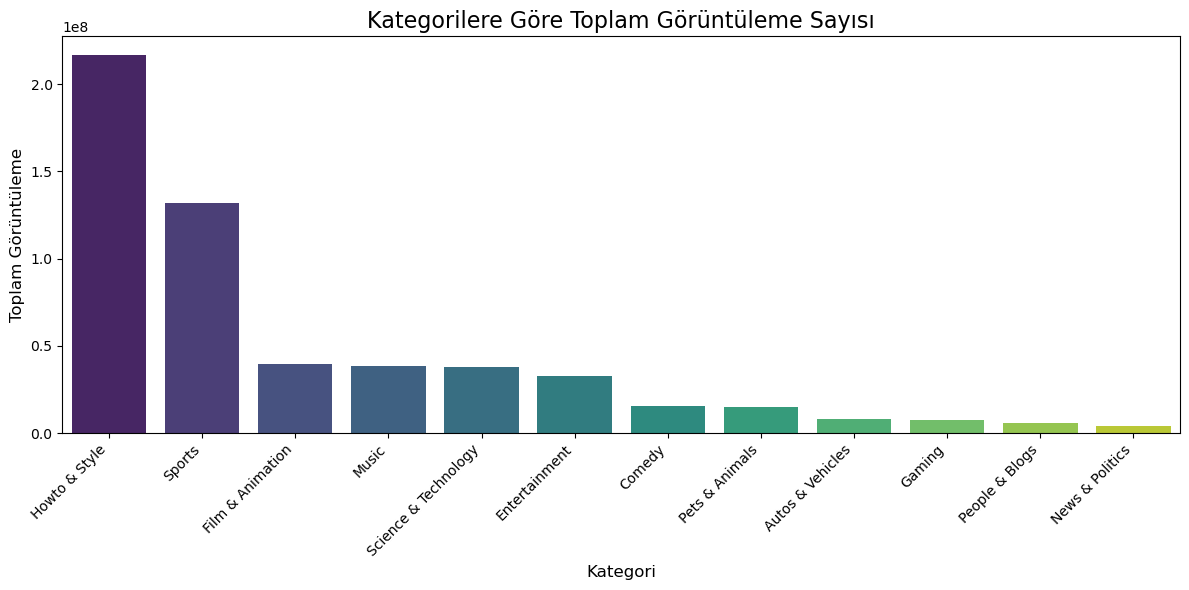

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorilere göre toplam görüntüleme sayısı
category_views = data.groupby('category')['views'].sum().sort_values(ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=category_views.index, y=category_views.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Kategorilere Göre Toplam Görüntüleme Sayısı', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Toplam Görüntüleme', fontsize=12)
plt.tight_layout()
plt.show()


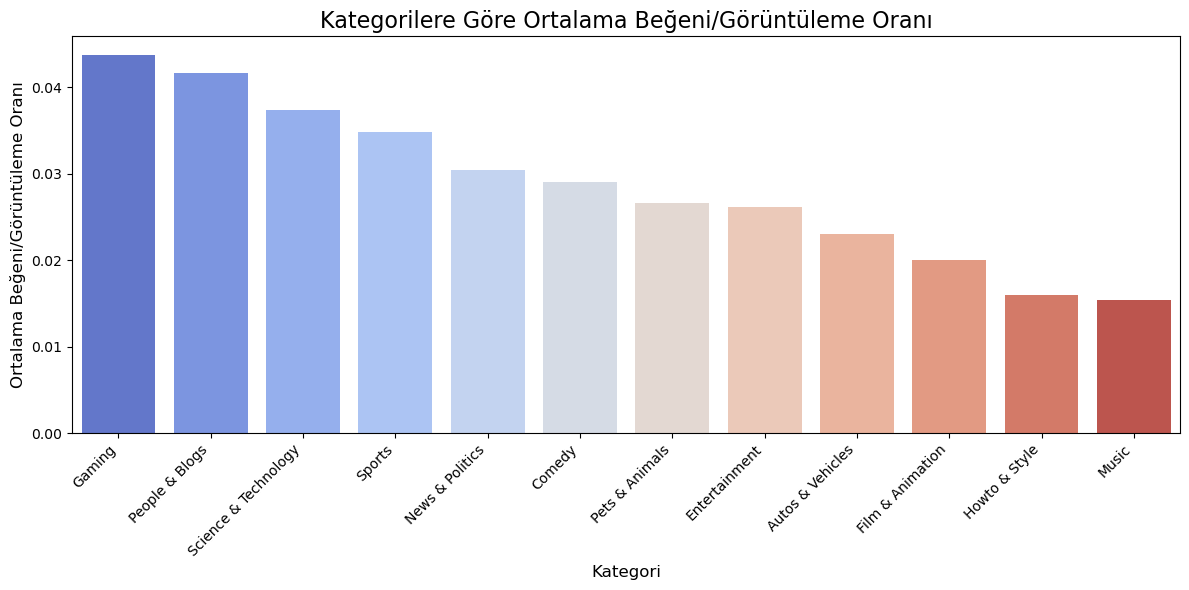

In [19]:
# Kategorilere göre beğeni/görüntüleme oranının ortalaması
category_like_ratio = data.groupby('category')['like_view_ratio'].mean().sort_values(ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=category_like_ratio.index, y=category_like_ratio.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Kategorilere Göre Ortalama Beğeni/Görüntüleme Oranı', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Ortalama Beğeni/Görüntüleme Oranı', fontsize=12)
plt.tight_layout()
plt.show()


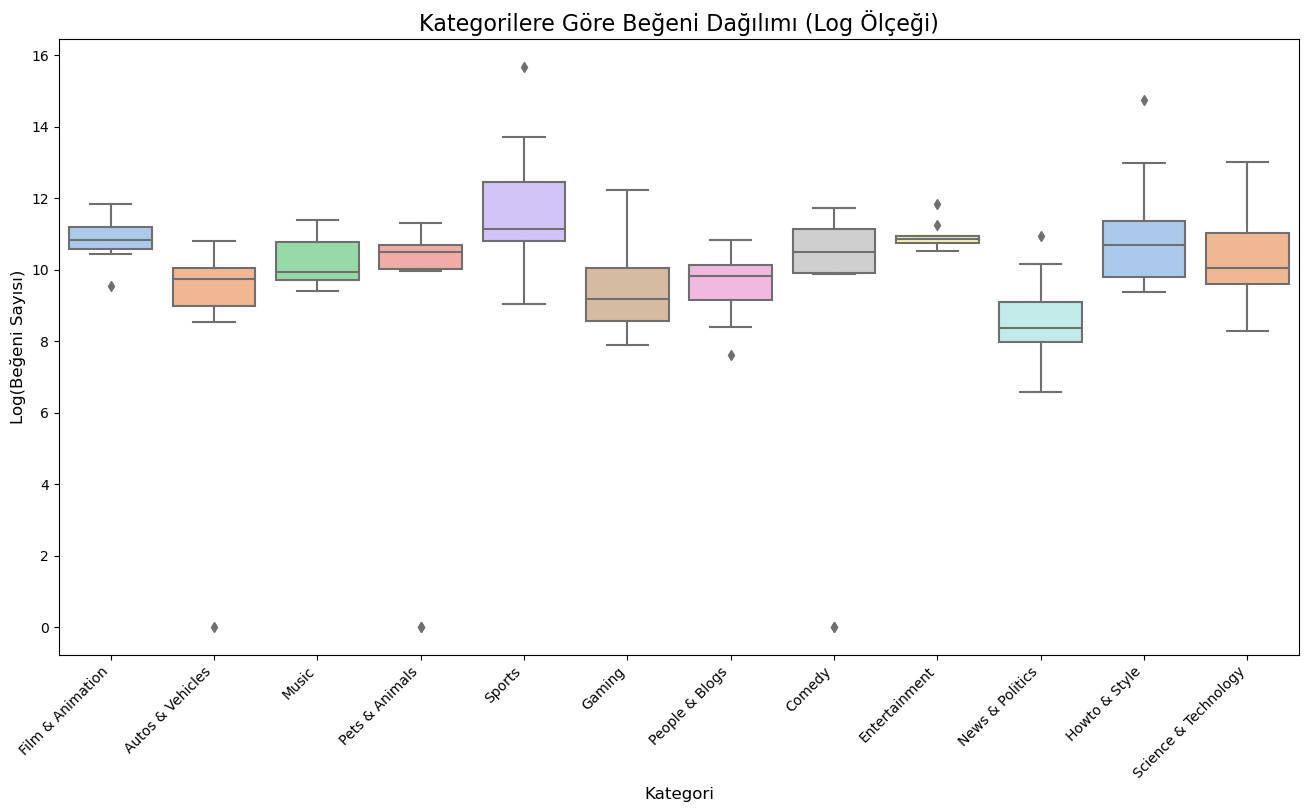

In [41]:
import numpy as np

plt.figure(figsize=(16, 8))

# Beğeniler (log dönüşümü)
plt.subplot(1, 1, 1)
sns.boxplot(x='category', y=np.log1p(data['likes']), data=data, palette='pastel')  # log1p: log(1+x) dönüşümü
plt.xticks(rotation=45, ha='right')
plt.title('Kategorilere Göre Beğeni Dağılımı (Log Ölçeği)', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Log(Beğeni Sayısı)', fontsize=12)

plt.show()


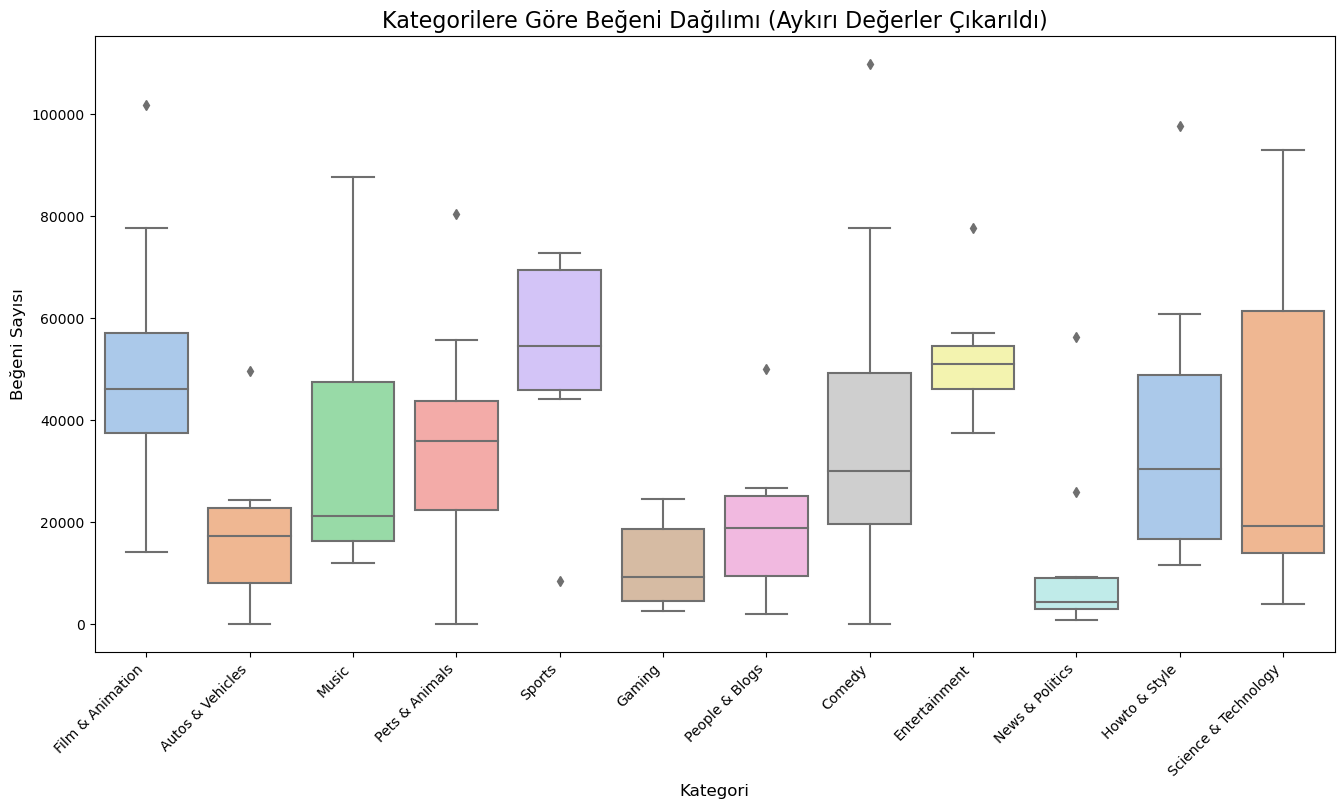

In [40]:
# Aykırı değerleri filtreleme (IQR)
Q1 = data['likes'].quantile(0.25)
Q3 = data['likes'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları belirleyin
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri çıkar
filtered_data = data[(data['likes'] >= lower_bound) & (data['likes'] <= upper_bound)]

plt.figure(figsize=(16, 8))

# Beğeniler (aykırı değerler çıkarıldı)
sns.boxplot(x='category', y='likes', data=filtered_data, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Kategorilere Göre Beğeni Dağılımı (Aykırı Değerler Çıkarıldı)', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Beğeni Sayısı', fontsize=12)

plt.show()


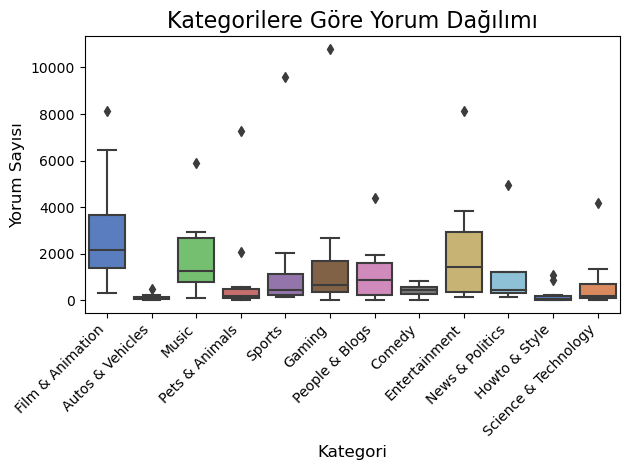

In [35]:
# Yorumlar
plt.subplot(1, 1, 1)
sns.boxplot(x='category', y='comments', data=data, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Kategorilere Göre Yorum Dağılımı', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Yorum Sayısı', fontsize=12)

plt.tight_layout()
plt.show()